### Analyzing the Stroop Effect

This analysis was done according to [these instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and graded according to this [project rubric](https://review.udacity.com/#!/rubrics/71/view).


(1) What is the independent variable? What is the dependent variable?

The independent variable is congruence (congruent words list vs incongruent words list). The dependent variable is the time it takes to name the ink colors.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

The set of hypotheses for this task are as follows:
- **Null hypothesis:** There is no difference in the time it takes to name the ink colors between the congruent words list and the incongruent words list. In other words, (Time for incongruent list) – (Time for congruent list) = 0.
- **Alternative hypothesis:** The time it takes to name the ink colors for the incongruent words list is greater than the time it takes for the congruent words list. In other words, (Time for incongruent list) – (Time for congruent list) > 0.

Mathematically, the null and alternative hypotheses are represented below:

H<sub>0</sub>: t<sub>incongruent</sub> - t<sub>congruent</sub> = 0

H<sub>a</sub>: t<sub>incongruent</sub> - t<sub>congruent</sub> > 0

>Note:<br>
>t<sub>incongruent</sub> = population mean time for incongruent list<br>
>t<sub>incongruent</sub> = population mean time for congruent list

The reasoning for the alternative hypothesis is that a person’s brain may process and name the ink color when it matches the written word differently than when the ink color and written word are contradictory. My reasoning for the congruent words list having a shorter time is that congruence may be beneficial for the brain's processing time due to the color and word matching. The brain wouldn’t need to take time to separate the ink color from the word, as it would need to do in the incongruent words list.

For this investigation I plan to use a one-tailed, paired samples t-test with a 95% confidence interval (alpha of 0.05). The reasoning for this statistical test is that each participant will do the task on the congruent words list and on the incongruent words list. Therefore, each participant will have two time measurements (one for each word list). The paired samples t-test will allow us to determine if congruence causes any difference in the time it takes to name the ink colors. It will be a one-tailed test because the alternative hypothesis is directional.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [2]:
import pandas as pd

# read in file and view first 5 lines
stroop = pd.read_csv('stroopdata.csv')
stroop.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [3]:
# ensure no missing values
stroop.isnull().sum()

Congruent      0
Incongruent    0
dtype: int64

In [4]:
# descriptive stats
stroop.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


There are 24 participants in this dataset, each with a time measurement for both the congruent and incongruent words lists. The mean amount of time to name the ink colors for the congruent words list is 14.0511 seconds, and for the incongruent words list it is 22.0159 seconds. The standard deviations for the congruent and incongruent words lists are 3.5594 seconds and 4.7971 seconds, respectively.

The minimum (min) and maximum (max) values, quartiles (Q1, Q2, Q3), and interquartile ranges (IQR) for the lists are displayed in the tables below.

<br>
<center><strong>Congruent Words List:</strong></center>

| Min    | Q1      | Q2      | Q3      | Max     | IQR    |
|--------|---------|---------|---------|---------|--------|
| 8.6300 | 11.8953 | 14.3565 | 16.2008 | 22.3280 | 4.3055 |

<br>
<center><strong>Incongruent Words List:</strong></center>

| Min     | Q1      | Q2      | Q3      | Max     | IQR    |
|---------|---------|---------|---------|---------|--------|
| 15.6870 | 18.7168 | 21.0175 | 24.0515 | 35.2550 | 5.3348 |

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Text(0.5,0,'Time in seconds')

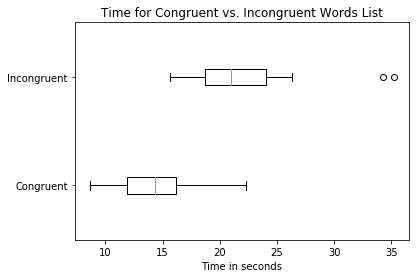

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.boxplot([stroop.Congruent, stroop.Incongruent], vert=False, labels=['Congruent', 'Incongruent'])
plt.title('Time for Congruent vs. Incongruent Words List')
plt.xlabel('Time in seconds')

The boxplot clearly shows that the mean amount of time to name the ink colors for the incongruent words list in this sample dataset is greater than the mean time for the congruent words list. We will use paired samples t-test below to test whether or not this difference in mean time is likely due to chance or if it is actually statistically significant.

The boxplot also shows two outliers in the Incongruent words list data. These outliers will be included in the analysis since the sample size is small already. Removing 2 of the 24 data points would negatively affect the statistical power.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [6]:
from scipy import stats

stats.ttest_rel(stroop.Incongruent, stroop.Congruent)

Ttest_relResult(statistic=8.020706944109957, pvalue=4.1030005857111781e-08)

The one-tailed, paired samples t-test above was performed with a confidence interval of 95%. With a t-value of 8.0207 and a p-value < 0.0001, we can reject the null hypothesis and conclude that the time it takes to name the ink color for the incongruent words list is statistically significantly greater than the time for the congruent words list.

These results align with my expectations and the alternative hypothesis stated and explained above.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

Below are some hypotheses about why the Stroop effect is seen in this task:

1. It is caused by the way the brain processes two different pieces of information (words and colors). In the congruent words list, the ink color and word are congruent, causing the processing of the ink color to happen smoothly and quickly. For the incongruent words list, the word and ink color are incongruent, which may cause the brain to take extra time processing them separately and deciding which information is important (the ink color).<br>
    This reasoning is also related to the hypothesis that the effect is caused by the way the brain processes patterns and relationships. The brain likely recognizes the pattern that the word and the ink color match for the congruent words list, and so after a few words it is easy to name the ink colors because the pattern/ relationship is clear. The word and ink color will both point the participant to the correct ink color. Alternatively, there is not an easily recognizable pattern or relationship in the incongruent words list between the words and ink color. For every word, the brain needs to process both the word and ink color and then distinguish which is the important piece of information.
2. The brain processes words more quickly than colors. In this case, being able to recognize the relationship between the word and ink color in the congruent words list would be highly advantageous for time. The participant would only need to read the word to know the ink color, as opposed to the incongruent words list where the word would not provide any useful information (and instead provide incongruent information).

To test the hypotheses above, further experiments and tasks could be done. Below are tasks that could be done to test each hypothesis.

1. To test if the effect is caused by the way the brain processes two different pieces of information and the relationship between them, a similar task could be constructed with the words Small, Medium, and Large written in different sizes in black ink. The congruent words list would have the words written in the font size they correspond to ('Small' written the smallest font, etc), and the incongruent words list would have the words written in contradictory sizes ('Small' written in the medium or large font, etc). The participants would be asked to name the size the word is written in for each list, and these times would be compared.
2. The hypothesis that the brain processes words more quickly than colors could be tested by doing a task with a words list and a colors list. The words list would consist of colors written out in black ink ('Yellow', 'Red', 'Blue', etc) and the colors list would consist of circles of different colors (a yellow circle, a red circle, a blue circle, etc) with no words. The participants would be asked to name the color based on the word or circle for each list and these times would be compared.

Further, it would also be interesting to see the time it takes to name the ink color for a list of non-color words (e.g. 'House', 'Chair', 'Work', etc) written in ink colors compared against the congruent and incongruent words lists of the Stroop Task. The results of this test could provide some insight as to whether or not the incongruence of the word and ink color is causing the effect, the congruence is causing the effect, or if both play a role.

### References:

https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet